In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [19]:
mnist_model = Sequential()

In [20]:
mnist_model.add(Flatten(input_shape=(x_train.shape[1], x_train.shape[2]))) # (28,28) => (784,)

In [21]:
input_layer = x_train.shape[1] * x_train.shape[2]
hidden_layer = 100
output_layer = 10

In [22]:
mnist_model.add(Dense(hidden_layer, activation="relu"))

In [23]:
mnist_model.add(Dense(output_layer, activation="softmax"))

In [24]:
mnist_model.compile(optimizer=Adam(learning_rate=1e-3), loss="categorical_crossentropy", metrics=['accuracy'])

In [25]:
mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
# normalize
x_data = x_train / 255.0 * 0.99 + 0.01
t_data = tf.keras.utils.to_categorical(y_train)

In [27]:
hist = mnist_model.fit(x_data, t_data, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3048 - accuracy: 0.9121 - val_loss: 0.1710 - val_accuracy: 0.9538
Epoch 2/30
1500/1500 [==============================] - 1s 988us/step - loss: 0.1412 - accuracy: 0.9586 - val_loss: 0.1515 - val_accuracy: 0.9571
Epoch 3/30
1500/1500 [==============================] - 1s 995us/step - loss: 0.0992 - accuracy: 0.9703 - val_loss: 0.1092 - val_accuracy: 0.9678
Epoch 4/30
1500/1500 [==============================] - 1s 997us/step - loss: 0.0757 - accuracy: 0.9774 - val_loss: 0.1001 - val_accuracy: 0.9707
Epoch 5/30
1500/1500 [==============================] - 1s 991us/step - loss: 0.0589 - accuracy: 0.9826 - val_loss: 0.0970 - val_accuracy: 0.9723
Epoch 6/30
1500/1500 [==============================] - 1s 991us/step - loss: 0.0475 - accuracy: 0.9863 - val_loss: 0.0921 - val_accuracy: 0.9737
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.0974 - val

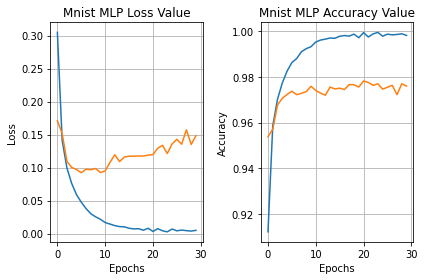

In [39]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)

plt.title("Mnist MLP Loss Value")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")

plt.subplot(1,2,2)

plt.title("Mnist MLP Accuracy Value")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()

plt.plot(hist.history["accuracy"], label="acc")
plt.plot(hist.history["val_accuracy"], label="val_acc")

plt.tight_layout()

In [13]:
# normalize
x_test_data = x_test / 255.0 * 0.99 + 0.01
t_test_data = tf.keras.utils.to_categorical(y_test)

In [14]:
mnist_model.evaluate(x_test_data, t_test_data)

313/313 [==============================] - 1s 1ms/step - loss: 0.1364 - accuracy: 0.9766


[0.1364225149154663, 0.9765999913215637]

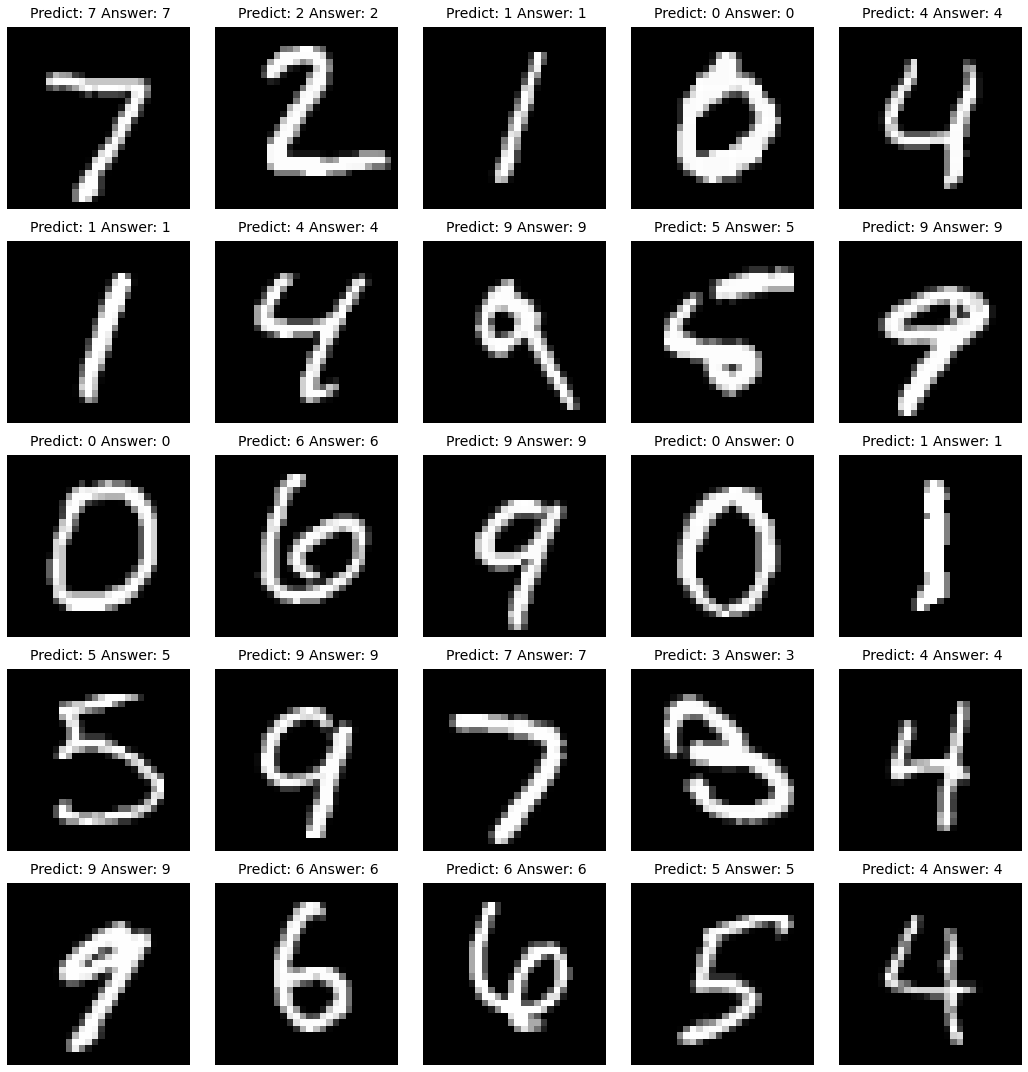

In [86]:
plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    img = x_test_data[i]
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    predict = np.argmax(mnist_model.predict(np.array([x_test[i]])))
    plt.text(3, -2, "Predict: %d Answer: %d" % (predict, y_test[i]), fontsize=14)
    plt.tight_layout()

plt.show()